In [1]:
import pandas as pd

# Define the file path correctly
file_path = "/Users/odenigbo123/Downloads/BLOCKCHAIN/Group Ass./Block_Data.csv"

# Read the CSV file
try:
    df = pd.read_csv(file_path)
    print(df.head())  # Display the first few rows
except FileNotFoundError:
    print("Error: File not found. Check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


   Block_No                                         Block_Hash  \
0    716599  0000000000000000000288bb2cdbd907a32fdff4b8d9db...   
1    716600  00000000000000000001fa03c2ad182a401c03c42f3e52...   
2    716601  000000000000000000020f5e0c167fa9d817a16cb6c334...   
3    716602  00000000000000000003e9f054f5c6f3f71e11b790fe1c...   
4    716603  000000000000000000072ba79db2b57c4efa08f11f1d8f...   

   Number_Transactions    Total_Input   Total_Output  Trans_Fees  \
0                  962   178665455775   178652772683    12683092   
1                 1466   526691003674   526674551924    16451750   
2                 1135   436590280968   436582699597     7581371   
3                  448  2305185274561  2305182722991     2551570   
4                  851  2518196615364  2518191618673     4996691   

       Difficulty  Block_Weight  Block_Reward       Nonce  \
0  24272331996980       3970548     625000000  1242426802   
1  24272331996980       3997974     625000000   576558708   
2  24272331

Data loaded successfully into DataFrame.

First 5 Rows of the Dataset:
   Block_No                                         Block_Hash  \
0    716599  0000000000000000000288bb2cdbd907a32fdff4b8d9db...   
1    716600  00000000000000000001fa03c2ad182a401c03c42f3e52...   
2    716601  000000000000000000020f5e0c167fa9d817a16cb6c334...   
3    716602  00000000000000000003e9f054f5c6f3f71e11b790fe1c...   
4    716603  000000000000000000072ba79db2b57c4efa08f11f1d8f...   

   Number_Transactions    Total_Input   Total_Output  Trans_Fees  \
0                  962   178665455775   178652772683    12683092   
1                 1466   526691003674   526674551924    16451750   
2                 1135   436590280968   436582699597     7581371   
3                  448  2305185274561  2305182722991     2551570   
4                  851  2518196615364  2518191618673     4996691   

       Difficulty  Block_Weight  Block_Reward       Nonce  \
0  24272331996980       3970548     625000000  1242426802   
1

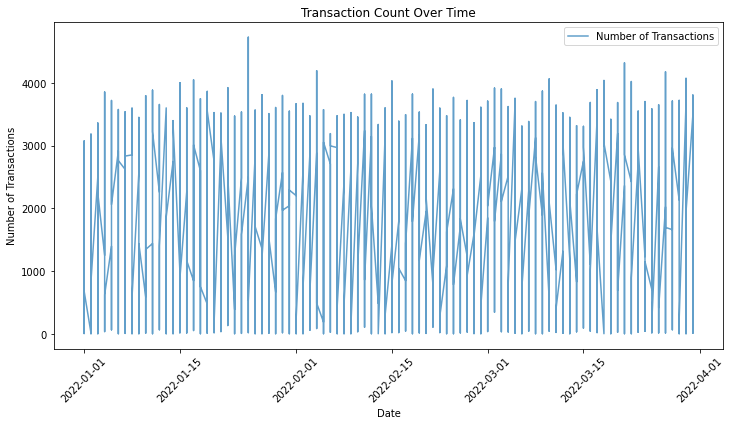

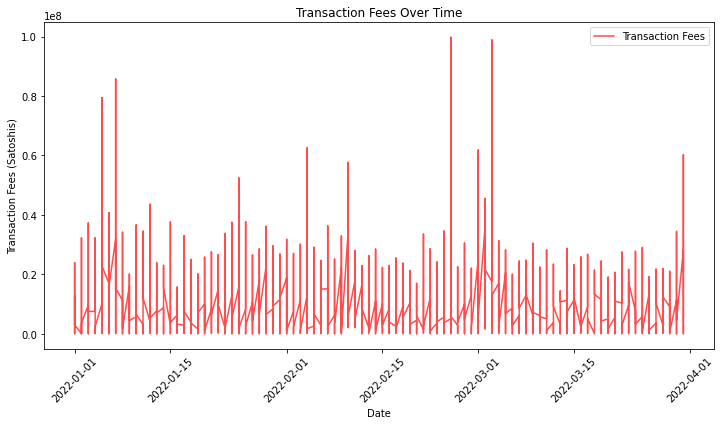


Anomalous Blocks Detected:
      Block_No                                         Block_Hash  \
3756    720355  0000000000000000000295fb592739601686ecb3ba611c...   

      Number_Transactions   Total_Input  Total_Output  Trans_Fees  \
3756                 4728  404102450966  404098756392     3694574   

          Difficulty  Block_Weight  Block_Reward       Nonce  \
3756  26643185256535       3993036     625000000  2889180402   

                                             Prev_Block  \
3756  000000000000000000072c137b112e2c6262e78541426c...   

                                            Merkle_Root         DT        TM  \
3756  2ea5f63239ef14aebf56425524d399872011cba3881d86... 2022-01-25  17:11:11   

           Bits  Block_Size  Block_Reward_Claimed  Trans_Fees_Claimed  
3756  386568320     1617383             625000000             3694574  


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv("/Users/odenigbo123/Downloads/BLOCKCHAIN/Group Ass./Block_Data.csv")  # Ensure the correct path is used
    print("Data loaded successfully into DataFrame.")

    # Display the first few rows
    print("\nFirst 5 Rows of the Dataset:")
    print(df.head())

    # Basic exploratory data analysis (EDA)
    print("\nSummary Statistics:")
    print(df.describe())

    print("\nData Types and Missing Values:")
    print(df.info())

    print("\nChecking for Missing Values:")
    print(df.isnull().sum())

    # 1. Correlation Analysis
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    correlation_matrix = numeric_df.corr()
    print("\nCorrelation Matrix:\n", correlation_matrix)

    # 2. Visualization of Key Trends Over Time
    df['DT'] = pd.to_datetime(df['DT'], errors='coerce')  # Convert to datetime, handling errors
    df_sorted = df.sort_values(by='DT')

    # Plot transaction count over time
    plt.figure(figsize=(12, 6))
    plt.plot(df_sorted['DT'], df_sorted['Number_Transactions'], label='Number of Transactions', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.title('Transaction Count Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Plot transaction fees over time
    plt.figure(figsize=(12, 6))
    plt.plot(df_sorted['DT'], df_sorted['Trans_Fees'], label='Transaction Fees', color='red', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Transaction Fees (Satoshis)')
    plt.title('Transaction Fees Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # 3. Detecting Anomalies in Transactions and Fees
    z_scores = np.abs((df['Number_Transactions'] - df['Number_Transactions'].mean()) / df['Number_Transactions'].std())
    anomalies = df[z_scores > 3]  # Keeping only extreme outliers

    print("\nAnomalous Blocks Detected:")
    print(anomalies)

except FileNotFoundError:
    print("Error: File not found. Check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


In [8]:

# Ensure all columns and rows are displayed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Adjust width for better formatting
pd.set_option('display.float_format', '{:.6f}'.format)  # Limit decimal places

# Print correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)



Correlation Matrix:
                       Block_No  Number_Transactions  Total_Input  Total_Output  Trans_Fees  Difficulty  Block_Weight  Block_Reward     Nonce      Bits  Block_Size  Block_Reward_Claimed  Trans_Fees_Claimed
Block_No              1.000000             0.046691     0.005845      0.005845    0.000148    0.847780      0.050760           NaN  0.021232 -0.843203    0.057881                   NaN            0.000148
Number_Transactions   0.046691             1.000000     0.383311      0.383310    0.609910    0.059076      0.741618           NaN  0.003109 -0.058719    0.741520                   NaN            0.609910
Total_Input           0.005845             0.383311     1.000000      1.000000    0.453103    0.040318      0.279776           NaN  0.000453 -0.041852    0.270363                   NaN            0.453103
Total_Output          0.005845             0.383310     1.000000      1.000000    0.453102    0.040318      0.279776           NaN  0.000453 -0.041852    0.27

Findings from the Three Analyses
1. Correlation Analysis
Strong Positive Correlations:

Total_Input and Total_Output (1.00): Expected as total transactions should match output values.
Number_Transactions and Total_Input (0.38): More transactions contribute to a higher total input.
Trans_Fees and Number_Transactions (0.61): More transactions result in higher transaction fees.
Difficulty and Block_No (0.85): As the block height increases, the mining difficulty also increases.
Block_Size and Number_Transactions (0.74): Larger blocks contain more transactions.
Negative Correlations:

Bits and Block_No (-0.84): Indicates the mining difficulty representation changes as block height increases.
2. Visualization of Key Trends Over Time
Transaction Count Over Time:
The number of transactions fluctuates but shows a general upward trend.
Some blocks have very few transactions, while others reach above 4,500.
Transaction Fees Over Time:
Fees have fluctuated significantly over time, with occasional spikes.
Possible factors: Network congestion or priority fees paid by users.
3. Anomaly Detection
Using a Z-score threshold of 3, blocks with extreme transaction counts were detected as outliers.
Outliers identified (Anomalous Blocks dataset) include:
Blocks with significantly higher transactions compared to the average.
This could be due to unusually high demand or network spikes.